In [14]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk vaderSentiment beautifulsoup4 requests



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
import pandas as pd

# Load IMDb .tsv files
name_df = pd.read_csv(r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project\name.basics.tsv', sep='\t', na_values='\\N')
akas_df = pd.read_csv(r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project\title.akas.tsv', sep='\t', na_values='\\N')
basics_df = pd.read_csv(r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project\title.basics.tsv', sep='\t', na_values='\\N')
principals_df = pd.read_csv(r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project\title.principals.tsv', sep='\t', na_values='\\N')
ratings_df = pd.read_csv(r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project\title.ratings.tsv', sep='\t', na_values='\\N')


C:\Users\agraw\AppData\Local\Temp\ipykernel_31768\1716141583.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  akas_df = pd.read_csv(r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project\title.akas.tsv', sep='\t', na_values='\\N')
C:\Users\agraw\AppData\Local\Temp\ipykernel_31768\1716141583.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  basics_df = pd.read_csv(r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project\title.basics.tsv', sep='\t', na_values='\\N')


In [23]:
import pandas as pd

# Define base path (change if needed)
base_path = r'C:\Users\agraw\OneDrive - Manipal University Jaipur\Desktop\Internship Tasks\Final Project'

# Load only 10,000 rows from each dataset
name_df = pd.read_csv(f'{base_path}\\name.basics.tsv', sep='\t', na_values='\\N', nrows=10000)
akas_df = pd.read_csv(f'{base_path}\\title.akas.tsv', sep='\t', na_values='\\N', nrows=10000)
basics_df = pd.read_csv(f'{base_path}\\title.basics.tsv', sep='\t', na_values='\\N', nrows=10000)
principals_df = pd.read_csv(f'{base_path}\\title.principals.tsv', sep='\t', na_values='\\N', nrows=10000)
ratings_df = pd.read_csv(f'{base_path}\\title.ratings.tsv', sep='\t', na_values='\\N', nrows=10000)


In [24]:
name_df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nconst             10000 non-null  object 
 1   primaryName        10000 non-null  object 
 2   birthYear          6117 non-null   float64
 3   deathYear          2265 non-null   float64
 4   primaryProfession  9937 non-null   object 
 5   knownForTitles     9947 non-null   object 
dtypes: float64(2), object(4)
memory usage: 468.9+ KB


In [31]:
# Filter only rows where titleType == 'movie'
movies_df = basics_df[basics_df['titleType'] == 'movie']

# Keep essential columns
movies_df = movies_df[['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres']]

# Keep relevant columns from ratings
ratings_df = ratings_df[['tconst', 'averageRating', 'numVotes']]

# Merge movie data with ratings
df = pd.merge(movies_df, ratings_df, on='tconst')

# Drop rows with missing values
df = df.dropna(subset=['primaryTitle', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes'])

# Convert types
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df = df.dropna()


In [33]:
import random

# A variety of review-style text examples
review_samples = [
    "A masterpiece with outstanding performances and brilliant storytelling.",
    "An average film with some good moments but overall forgettable.",
    "Terrible plot and wooden acting made this a waste of time.",
    "Visually stunning and emotionally engaging — a cinematic gem.",
    "Mediocre script, but the action scenes were entertaining.",
    "A slow and boring movie that fails to deliver anything new.",
    "Heartwarming and beautifully shot, with a touching message.",
    "Tries hard to be meaningful but ends up being pretentious.",
    "An instant classic that fans will love for generations.",
    "Disappointing and cliché-ridden, not worth the hype."
]

# Assign a random review description to each movie
df['description'] = df['tconst'].apply(lambda x: random.choice(review_samples))


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\agraw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\agraw\AppData\Local\Temp\ipykernel_31768\1964591328.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='main_genre', y='sentiment', estimator='mean', palette='viridis')


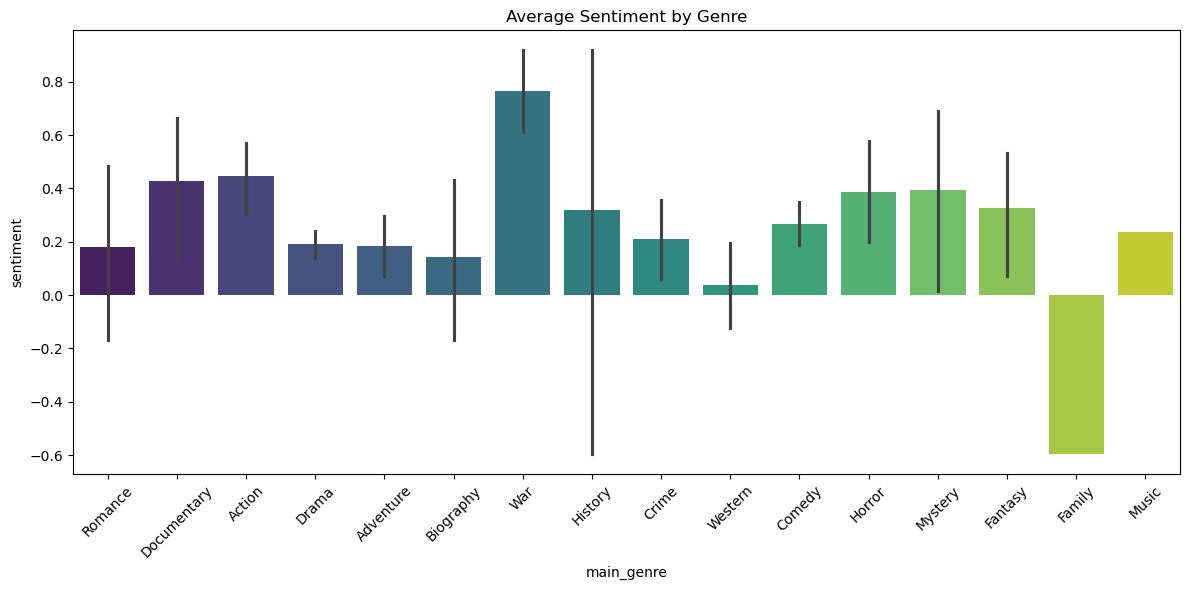

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract first genre (for simplicity)
df['main_genre'] = df['genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Plot sentiment per genre
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='main_genre', y='sentiment', estimator='mean', palette='viridis')
plt.title("Average Sentiment by Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = ['averageRating', 'runtimeMinutes', 'sentiment']
target = 'numVotes'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: -0.2965005860366945
Mean Squared Error: 125531.06950730951


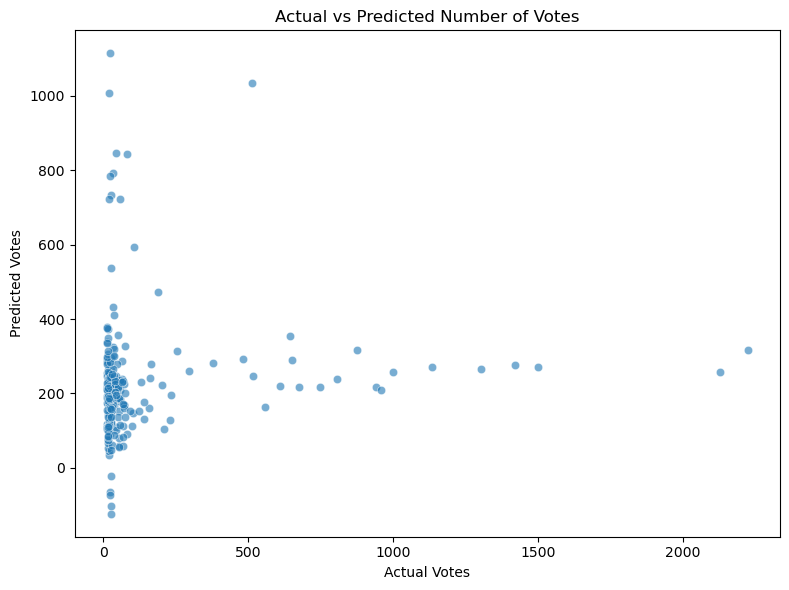

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Votes")
plt.ylabel("Predicted Votes")
plt.title("Actual vs Predicted Number of Votes")
plt.tight_layout()
plt.show()
